In [1]:
import sys
# на уровень выше из research_rank/
sys.path.insert(0, '..')
from pathlib import Path
import numpy as np
import pandas as pd
import json
from collections import defaultdict
from plot_json import convert_dictlist_to_matrix
import matplotlib.pyplot as plt

### Протокол с $\frac{\lambda}{4}$

Рассмотрим различные протоколы. Начнём с протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

100%|██████████| 500/500 [04:28<00:00,  1.86it/s]

Mean fidelity: [0.03164048 0.09708871 0.81954877 0.87709529 0.99999997] 	Std fidelity: [3.67551932e-02 8.84773615e-02 1.08522122e-01 8.75649285e-02
 2.77911596e-08]
Mean svx for protocol: [ 1.00000000e+00  8.57857160e-01  1.19282036e-01  7.91486638e-02
 -1.16807761e-08] 	Std s_cvx for protocol: [0.00000000e+00 8.75770987e-02 6.80124463e-02 4.83868927e-02
 6.79142736e-08]


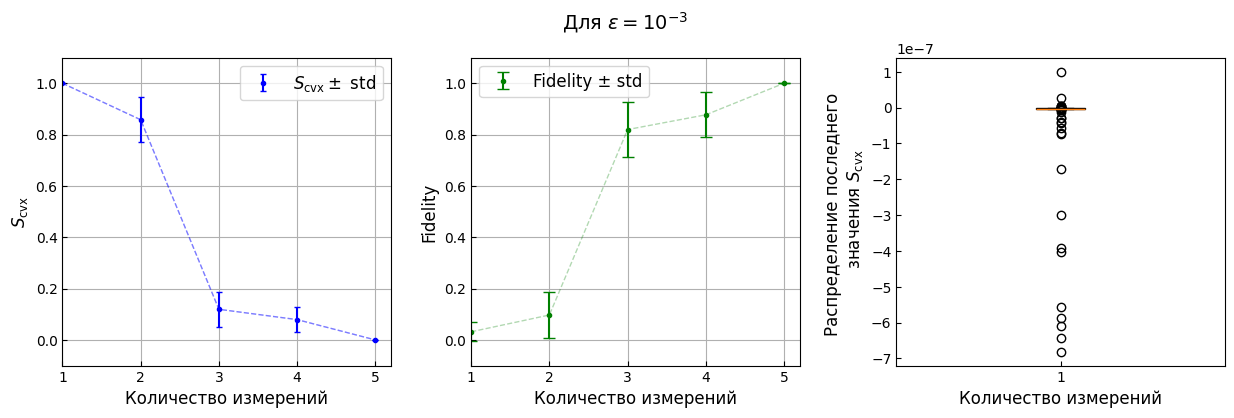

In [4]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [04:30<00:00,  1.85it/s]

Mean fidelity: [0.02960678 0.09807849 0.81826216 0.87608949 0.99999998] 	Std fidelity: [3.32239871e-02 8.98140100e-02 1.10567657e-01 9.19262898e-02
 4.33802725e-09]
Mean svx for protocol: [ 1.00000000e+00  8.47205914e-01  1.19142609e-01  7.70990615e-02
 -2.54548240e-09] 	Std s_cvx for protocol: [0.00000000e+00 9.34358864e-02 7.06708289e-02 5.16187242e-02
 5.31052795e-09]


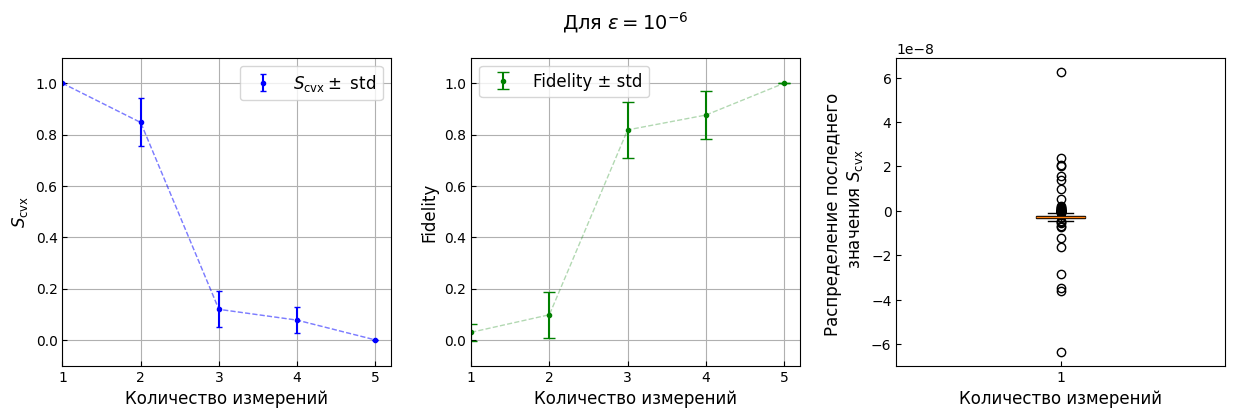

In [5]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(pi / 8), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4 ,5])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3]),\
                               tomography_1.Fidelity(x_min_list[4], x_max_list[4])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

Рассмотрим различные протоколы. Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

100%|██████████| 500/500 [03:03<00:00,  2.72it/s]

Mean fidelity: [0.10431829 0.29732599 0.98256536 0.99944677] 	Std fidelity: [0.12823003 0.2291726  0.06847361 0.00091149]
Mean svx for protocol: [1.00000000e+00 7.73544240e-01 1.26806757e-02 7.05178174e-04] 	Std s_cvx for protocol: [0.         0.16376031 0.04538067 0.00076405]


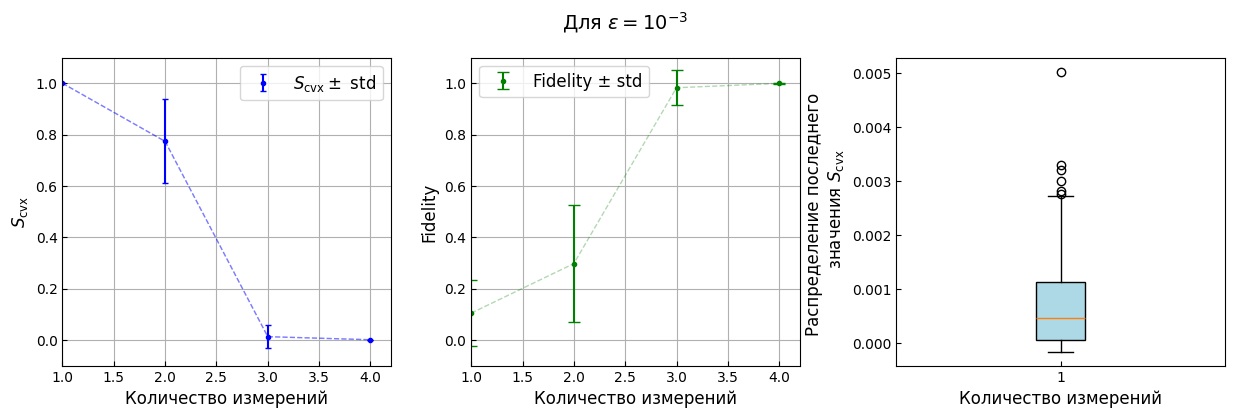

In [18]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:13<00:00,  2.58it/s]

Mean fidelity: [0.10678358 0.27434026 0.98084733 0.99999988] 	Std fidelity: [1.35478955e-01 2.12490668e-01 6.91024985e-02 6.14818126e-07]
Mean svx for protocol: [1.00000000e+00 7.95531178e-01 1.27964380e-02 4.25580729e-07] 	Std s_cvx for protocol: [0.00000000e+00 1.51889816e-01 4.56427642e-02 6.31994034e-07]


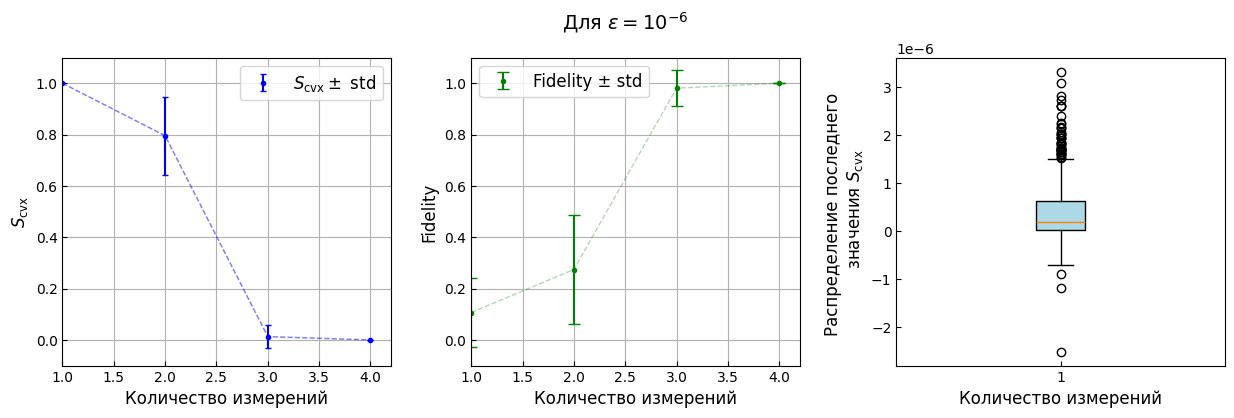

In [19]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8), Gl_4(0)]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

Рассмотрим различные протоколы. Рассмотрим протокола с $\frac{\lambda}{4}$ без измерения $QWP \; @ \; \frac{\pi}{8}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 3

  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

Mean fidelity: [0.10171772 0.21969059 0.24516176 0.86506897] 	Std fidelity: [0.08410181 0.09460825 0.06835069 0.03862187]
Mean svx for protocol: [1.         0.79880011 0.70962172 0.0929798 ] 	Std s_cvx for protocol: [0.         0.0667759  0.09712655 0.01766347]


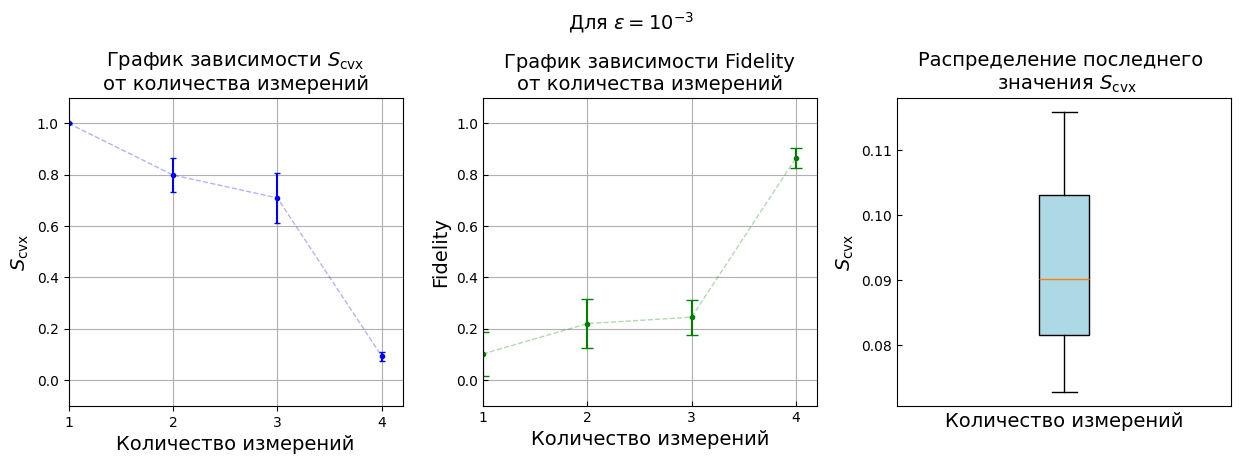

In [2]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 14,          # Размер заголовка
    'axes.labelsize': 14,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 3

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-3,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])]
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-3}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

100%|██████████| 500/500 [03:04<00:00,  2.71it/s]

Mean fidelity: [0.03437952 0.09907018 0.15099866 0.87927669] 	Std fidelity: [0.04066277 0.09097807 0.11186167 0.09038661]
Mean svx for protocol: [1.         0.84571886 0.78100532 0.07528347] 	Std s_cvx for protocol: [0.         0.09558333 0.10495854 0.05044121]


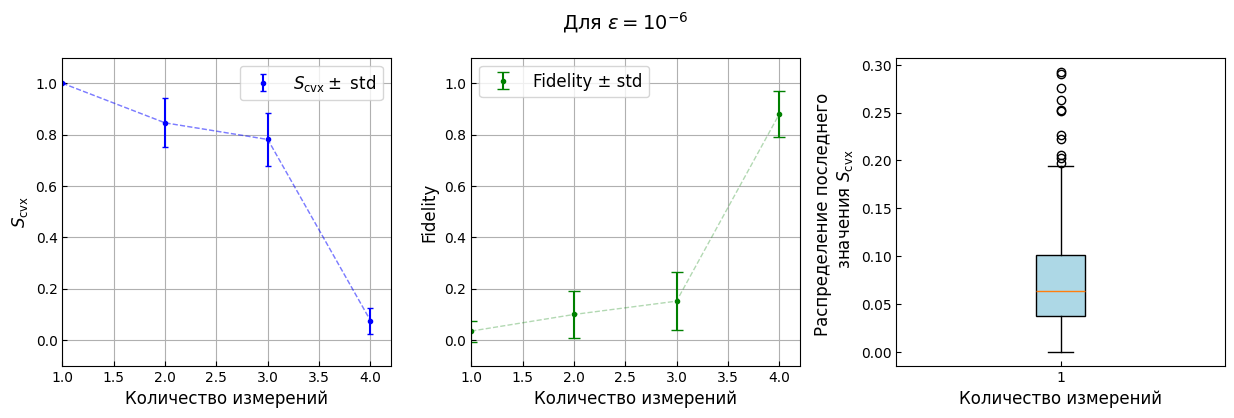

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_4(0), Gl_4(3 * pi / 8), Gl_4(5 * pi / 8), Gl_4(7 * pi / 8)]
rank = 3
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)

### Протокол с Фёдорова

Теперь рассмотрим протокола с $\frac{\lambda}{4}$ с $\epsilon = 10^{-3}$ и $\epsilon = 10^{-6}$  по 500 матрицам плотности при восстановлении с рангом 1

In [ ]:
from Qutrit import*
from Adaptive_compresive_cending_qutrit import*
plt.rcParams.update({
    'font.size': 16,               # Размер шрифта по умолчанию
    'axes.titlesize': 16,          # Размер заголовка
    'axes.labelsize': 12,          # Размер подписей осей
    'xtick.labelsize': 10,         # Размер цифр на оси X
    'ytick.labelsize': 10,         # Размер цифр на оси Y
    'legend.fontsize': 12          # Размер шрифта легенды
})


protocol = [Gl_2(pi / 8) @ Gl_8(0), Gl_2(pi / 8), np.diag((1,1,1))]
rank = 1
tomography_1 = ACT(protocol, rank, 3)

x = np.array([1, 2, 3, 4])
svx_list = []         
fidelity_list = []
N = 500

for i in tqdm(range(N)):
    svx_list_one_measurement, fidelity_list_one_measurement, fidelity_x_min, fidelity_x_max,\
    x_min_list, x_max_list, state_ml = tomography_1.main(rank_psevdoin=rank, epsilon_ml=10*-11, epsilon_act=10**-6,\
                                                         max_iters_in_semidefinite_program=10**8)
    for ind_min in range(len(x_min_list)):
        x_min_list[ind_min] = np.array([[complex(item) for item in row] for row in x_min_list[ind_min]])
    for ind_max in range(len(x_max_list)):
        x_max_list[ind_max] = np.array([[complex(item) for item in row] for row in x_max_list[ind_max]])
    
    fidelity_list_xmax_xmin = [tomography_1.Fidelity(x_min_list[0], x_max_list[0]), tomography_1.Fidelity(x_min_list[1], x_max_list[1]),\
                               tomography_1.Fidelity(x_min_list[2], x_max_list[2]), tomography_1.Fidelity(x_min_list[3], x_max_list[3])] 
    if svx_list_one_measurement is not np.inf :
        svx_list.append(svx_list_one_measurement)
        fidelity_list.append(np.abs(fidelity_list_xmax_xmin))

y = np.mean(np.array(svx_list),axis = 0)
std = np.std(np.array(svx_list),axis = 0)
fidelity_mean = np.mean((fidelity_list), axis = 0)
fidelity_std = np.std(np.array(fidelity_list),axis = 0)


print("Mean fidelity:", fidelity_mean , "\tStd fidelity:", fidelity_std)
print("Mean svx for protocol:", y,"\tStd s_cvx for protocol:", std)
title = r"Для $\epsilon = 10^{-6}$" + "\n"
pl_fid_s_cvx_distr(x, y, std, fidelity_mean, fidelity_std, np.array(svx_list)[:, -1], title)